# Multi-Mission XGA

This tutorial highlights the differences between XGA interaction with telescope-specific software, and recommends the best way to use XGA when interacting with data from different telescopes. 

## Generating Products

When generating products for a source with multi-telescope observations associated with it, XGA will interact with each telescope specific software needed. Since different softwares are used, it is important to consider the subtlities and caveats associated with the different telescopes. In this tutorial we detail the considerations the user should take into account when comparing products from different telescopes. We do not go into full detail of the capabilities of the product related functions, for this please seek the other pages of the docs. 

In [2]:
# Let's declare a source to demonstrate with
from astropy.units import Quantity
from xga.sources import GalaxyCluster
from xga.generate.esass import evtool_image, expmap, srctool_spectrum, srctool_lightcurve
from xga.generate.sas import evselect_image, eexpmap, evselect_spectrum, evselect_lightcurve, emosaic
from xga.xspec import single_temp_apec

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# And defining an individual source object for Abell 907
src = GalaxyCluster(149.59209, -11.05972, 0.16, r500=Quantity(1200, 'kpc'), 
                    r200=Quantity(1700, 'kpc'), name="A907",
                    search_distance={'erosita': Quantity(3, 'deg'), 
                                     'xmm': Quantity(30, 'arcmin')})

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/regions/core/compound.py:93: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = self.operator(*np.array(padded_data, dtype=np.int))
/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/regions/core/compound.py:93: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify th

## Images

### eROSITA
Images are generated with different sizes depending on their origin, but all with a binning of 4.35 arcseconds per pixel. This was chosen to match the XCS binsize. 

* **Pointed** observations - The size of the image is 1.05 degrees, this is so the full eROSITA FOV (1.03 degrees) is captured.
* **Calibration Fields** (ie. eFEDS) - Images are 7.5 by 9 degrees in the x and y direction respectively. 
* **Other Calibration Fields** (ie eta Cha) - Images are 7 by 7 degrees.
* **eRASS sky tiles** - Images are 3.6 by 3.6 degrees, chosen to match the eROSITA team's definition of a skytile. This will have some overlapping areas between other skytiles, so the area of the sky is not completely unique.

In [3]:
# Making images for eROSITA observations is done through the evtool_image function
evtool_image(src)

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note that XGA will generate a **combined** image from all seven telescope modules.

### Retrieving Images

XGA generates one combined image for all seven eROSITA telescope modules. When retrieving products using the 'inst' keyword, these combined images are stored under the inst parameter 'combined'. If the user tries to retrieve images for individual instruments, an error will be thrown.

In [4]:
src.get_images(telescope='erosita', inst='combined', lo_en=Quantity(0.5, 'keV'), hi_en=Quantity(2.0, 'keV'))

In [5]:
src.get_images(telescope='erosita', inst='TM1', lo_en=Quantity(0.5, 'keV'), hi_en=Quantity(2.0, 'keV'))

NoProductAvailableError: Cannot find any images matching your input.

### Viewing eRASS Images
Since eRASS is divided into large sky tiles, when viewing an image with XGA, it can be difficult to see the source within the full skytile image using the default arguments in the `view()` method. Here we reccommend some optional arguments to use to see a source in more detail.  

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/regions/core/compound.py:93: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = self.operator(*np.array(padded_data, dtype=np.int))


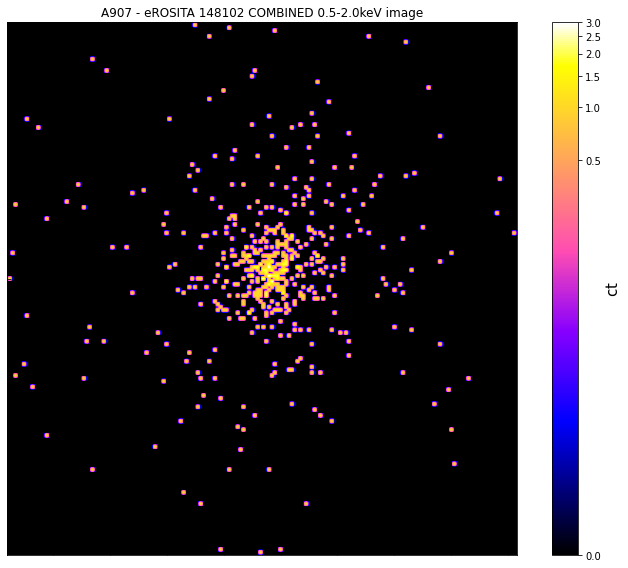

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/regions/core/compound.py:93: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = self.operator(*np.array(padded_data, dtype=np.int))


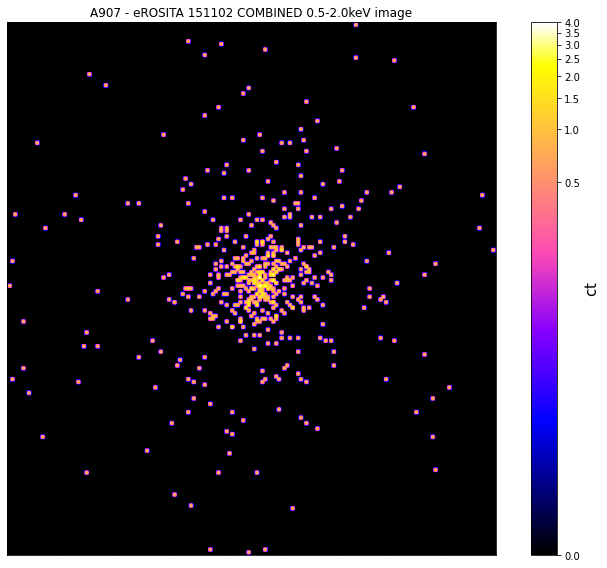

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/regions/core/compound.py:93: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = self.operator(*np.array(padded_data, dtype=np.int))


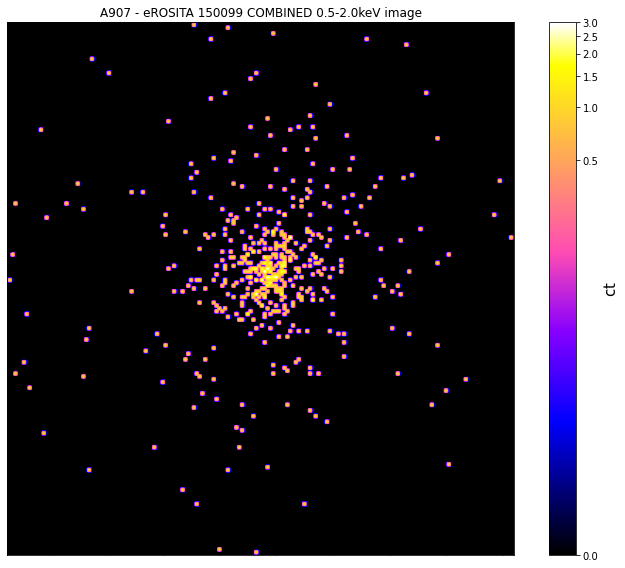

In [6]:
# Retrieving the eROSITA images
images = src.get_images(telescope='erosita', lo_en=Quantity(0.5, 'keV'), hi_en=Quantity(2.0, 'keV'))

for img in images:
    # get_mask returns the source and background mask, 
    # so we use [0] index to get just the source mask
    mask = src.get_mask('r500', obs_id=img.obs_id, telescope='erosita')[0]
    # This will then show us the r500 region of the image
    # Zoom_in then crops the image around pixels that are non zero
    img.view(mask=mask, zoom_in=True)

### XMM
All images are made with a binning of 4.35 arcseconds per pixel.

In [7]:
evselect_image(src)

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There is an additional optional argument in the XMM image generation function: 'add_expr'. This allows the user to add a string to the SAS expression keyword. 

In [8]:
evselect_image(src, add_expr='')

## Exposure Maps
### eROSITA
XGA generates one merged exposure map for all seven telescope modules aboard eROSITA. Note that for non pointed osbervations, exposure map generation can take a longer time, as it has to calculate exposures for each snapshot of time, as the telescope slews across the sky. 

XGA also removes the 'REFYCRVL' keyword from the generated exposure map, as this gets occupied with a nonsense value (as confirmed with the eROSITA team), which cannot be read into memory later. 

In [16]:
expmap(src)

Generating products of type(s) expmap: 100%|██████████| 3/3 [05:44<00:00, 114.90s/it]


### XMM

In [17]:
eexpmap(src)

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Spectra
### eROSITA
Spectra are generated differently depending on the source type and observing mode.

**Source type**:

* Spectra of **extended** sources are generated using the psftype=NONE so this does not apply any PSF corrections. The exttype parameter is set to MAP, this means that the spatial extent of the source is described by a detection map. This detection map is an image generated by XGA of the observation one is generating a spectrum for, the image is of the full eROSITA energy range (0.2 keV - 10 keV). This is then used for effective area calculations.
* Spectra of **point** sources are generated using the psftype='2D_PSF', and exttype='POINT'.

**Observing Mode**:
Since a source will move across the field of view as the telescope slews, the PSF and effective area of that source will vary. There are two parameters eSASS uses to control the accuracy of the spectra generated due to this variation. The first is **tstep**, which are the time bins that the PSF correction, vignetting correction and effective area are calculated for. The second is **xgrid**, which controls the sampling of the PSF, vignetting, and the effective area to perform the corrections with. Processing time is very sensitive to these parameters, so within XGA we have chosen these values to compromise between accuracy and computing time. 

* **Survey** mode - Tstep is set to 0.5s. Within this time the telescope will have scanned across 45 arcseconds (assuming the eRASS nominal scan speed) - which corresponds to about 5 detector pixels. 
* **Pointed** mode - Tstep is set to 100s. As the telescope is not moving with respect to the sky in this observing mode, we can increase the tstep, decrease processing time, and not sacrifice any spectral generation accuracy. 
* For both modes we set xgrid to be its default eSASS value (1.0). 


For both sources, the background spectrum are generated seperately from the source spectrum. This is done for two reasons, the first is so the background spectrum has its own ARF and RMF, which is appropriate for large sources. Secondly eSASS will use the GTIs of the source spectra for the background spectra - if generated together. If the source is a large extended source, this can have the effect of throwing away lots of usable data from the background. We therefore chose to generate them separately, so that we use the GTIs of the background region for background spectra generation. Lastly we increase the timestep to 2s for the background region, as this decreases the processing time, and less spatial accuracy is acceptable for background spectra. 

Spectra may be grouped by either a minimum count or signal to noise, this is implemented using Heasoft's ftgrouppha command. 

In [26]:
# Making spectra for eROSITA observations is done through the srctool_spectrum function
srctool_spectrum(src, 'r500')

Generating products of type(s) spectrum: 100%|██████████| 3/3 [01:41<00:00, 33.92s/it]


In [27]:
# By default this generates a combined spectrum for all eROSITA instruments
# To generate each instrument separately use the combine_tm argument
srctool_spectrum(src, 'r500', combine_tm=False)

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Generating products of type(s) spectrum: 100%|██████████| 21/21 [00:11<00:00,  1.86it/s]


### XMM

#### Extra keyword arguments

When generating XMM spectra, an additional keyword argument ``oversample`` is available in the `evselect_spectrum` function. If the ``one_rmf`` keyword argument is set to True (as is the default) then only one RMF per ObsID-instrument combo will be generated, and will be used by any future spectrum generation for the ObsID-instrument combo. RMFs do change slightly with position on detector, but are also very computationally expensive to produce (relative to the other spectrum generation tasks), as such this is an acceptable compromise.


#### ARF generation

The Auxiliary Response File (ARF), is an extremely important product which describes the change of the effective area of the telescope with energy, something that must be understood to try and recover the spectrum that was actually emitted by the object rather than the one that was recieved by the telescope. Calculating the ARF is a fairly complex process which, for XMM, is fully described in the [SAS documentation](http://xmm-tools.cosmos.esa.int/external/sas/current/doc/arfgen/), and as such the SAS *arfgen* procedure has numerous configuration options for the user to set.

XGA chooses to generate ARFs in two different ways, depending on whether the source being analysed is extended or point-like. For extended sources we generate a 'detector map', which is essentially an image of the source in detector coordinates, and acts to weight the calculation of the ARF curve by the emission of the source. For point sources this is not valid or necessary, so we do not use a detector map, and we set the `extendedsource` argument to False.

The use of the detector map to weight ARF generation for extended sources does extend the runtime, so do not be surprised if generating many spectra takes hours.

## Lightcurves
### eROSITA
To generate eROSITA lightcurves, the srctool command is used. For all source types we set: 'exttype'='POINT', 'psftype'= '2D_PSF', tstep='0.5', 'lct'='REGULAR', and 'lc_gamma'='1.9'. 

In [28]:
# Making lightcurves for eROSITA observations is done through the srctool_lightcurve function
srctool_lightcurve(src, 'r500')

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [29]:
# By default this generates a combined lightcurve for all eROSITA instruments
# To generate each instrument separately use the combine_tm argument
srctool_lightcurve(src, 'r500', combine_tm=False)

IndexError: list index out of range

Allowed pattern types can be controlled through the 'patt' argument. To see how to represent different patterns see: https://erosita.mpe.mpg.de/edr/DataAnalysis/prod_descript/EventFiles_edr.html 

In [30]:
# Here we select all valid patterns (which is the XGA default)
srctool_lightcurve(src, 'r500', patt=15)

IndexError: list index out of range

## Analysis
When fitting models and acquiring astrophysical parameters of XGA sources, some considerations must be made depending on the origin of the observations. In this section we reccommend the best way to use XGA's inbuilt functions for each telescope.

## Fitting Models to Spectra
### eROSITA

When fitting models, XGA will generate a spectra for each telescope module indiviually.
By default all models that can be fit to spectra using XGA use simultaneous fitting. Since eROSITA's instruments are mostly identical, it is reccommended to use 'stacked_spectra=True' when using these models, as this should give a more reliable fit - especially for low exposure sources. 

In [4]:
single_temp_apec(src, 'r500', stacked_spectra=True)

/its/home/jp735/.conda/envs/xga_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/lustre/projects/astro/general/jp735/XGA_dev/XGA/xga/xspec/fit/general.py:92: UserWarning: Spectrum stacking is not currently supported for XMM, and so combined spectra will not be used for these XSPEC fits.
  sources, inn_rad_vals, out_rad_vals = _pregen_spectra(sources, outer_radius, inner_radius, group_spec, min_counts,
Running XSPEC Fits: 100%|██████████| 2/2 [01:43<00:00, 51.54s/it]


## Retrieving fit values

### XMM

When XSPEC performs a simultaneous fit to multiple spectra, and then a luminosity is measured, it actually measures luminosities individually for all the spectra. XGA preferentially reports a PN luminosity (because of the greater sensitivity compared to the MOS cameras). If a PN spectra was not available, then a MOS2 luminosity is taken instead, and if MOS2 wasn't available then a MOS1 luminosity will be used.